## code discount20active15

In [3]:
import pandas as pd
import MySQLdb
import time
import sys
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt

In [4]:
## ______________________________ SET PARAMETER ______________________________________
k = 0
z = 0
m1 = 0
m2 = 0
m3 = 0
m4 = 0
m5 = 0
m6 = 0
m7 = 0
m8 = 0
m9 = 0  

j = 0
d = 30
time_a = pd.date_range('2016-10-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-10-01 00:14:59', periods=96*d, freq='15T')

conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()


query_empty = """truncate table active.discount20active15""" 
c.execute(query_empty)
print "active.discount20active15 are Empty!!! \n"


###  _________________ SELECT ONLY ACTIVE15%
query = "SELECT no,active15  FROM check_event.active WHERE no >= '%s'   AND no <= '%s'; " % (0,2700)
df = pd.read_sql(query, conn)


query1 = "SELECT *  FROM active.consum_load WHERE  Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a[0],time_b[(96*d)-1])
df1 = pd.read_sql(query1, conn)


query2 = "SELECT *  FROM active.target_all WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a[0],time_b[(96*d)-1])
df2 = pd.read_sql(query2, conn)

# df1['Computer'] = df1['Computer'].astype(float)
# df1['TV'] = df1['TV'].astype(float)
# df1['Computer'] = df1['Computer'].astype(float)

def end(j):
    check =1
    m1 = j+1
    m2 = j+1
    m3 = j+1
    m4 = j+1
    m5 = j+1
    m6 = j+1
    m7 = j+1
    m8 = j+1
    m9 = j+1
    while (check == 1):
        while df1.Computer[m1] > 0:
            m1 += 1
        while df1.TV[m2] > 0:
            m2 += 1
        while  df1.Fan[m3] > 0:
            m3 += 1
        while df1.kitchen_light[m4] > 0:
            m4 += 1
        while df1.bedroom_light[m5] > 0:
            m5 += 1
        while df1.hair_dryer[m6] > 0:
            m6 += 1
        while df1.elec_thermos[m7] > 0:
            m7 += 1
        while df1.water_heater[m8] > 0:
            m8 += 1
        while df1.air[m9] > 0:
            m9 += 1
        check = 0
        print "\ncheck_end position processing done!"
        print m1,m2,m3,m4,m5,m6,m7,m8,m9
        return (m1,m2,m3,m4,m5,m6,m7,m8,m9)
    
    
def state(j,m1,m2,m3,m4,m5,m6,m7,m8,m9):
    if j <= m1:
        ans1 = df1.Computer[j]
    else:
        ans1 = 0
    if j <= m2:
        ans2 = df1.TV[j]
    else:
        ans2 = 0
    if j <= m3:
        ans3 = df1.Fan[j]
    else:
        ans3 = 0
    if j <= m4:
        ans4 = df1.kitchen_light[j]
    else:
        ans4 = 0
    if j <= m5:
        ans5 = df1.bedroom_light[j]
    else:
        ans5 = 0
    if j <= m6:
        ans6 = df1.hair_dryer[j]
    else:
        ans6 = 0
    if j <= m7:
        ans7 = df1.elec_thermos[j]
    else:
        ans7 = 0
    if j <= m8:
        ans8 = df1.water_heater[j]
    else:
        ans8 = 0
    if j <= m9:
        ans9 = df1.air[j]
    else:
        ans9 = 0
    k = ans1+ans2+ans3+ans4+ans5+ans6+ans7+ans8+ans9
    print "take k =",k,"out"
    return k 
              
while ( j <= (96*d)-1):
    newwatt = df2.watt[j] - k
    sub = df2.p20[j] - newwatt
    if j == 0:
        sum_sub = sub
       
    else :
        sum_sub = sum_sub + sub
     
    c.execute("INSERT INTO active.discount20active15 (Timestamp,target,new_watt,sub,sum_sub) VALUES( %s,%s,%s,%s,%s)",(time_b[j],df2.p20[j],newwatt,sub,sum_sub))
    conn.commit()
    print  "\nat items |||||||||||||||",j,          " target =",df2.p20[j],"watt now at",newwatt," |||||  ",sub,"______",sum_sub,"\n"
    if sum_sub < 0:
        print "\n______________________________ HEAD AND TAIL PROCESS______________________________  "
        HT = df.active15[z]
        z +=1
        if   HT == 1:
            print "  |||||||| HEAD OCCUR = USER ACTIVE for GUIDANCE |||||||| "
            m = end(j)
            m1= m[0]
            m1 -= 1
            m2= m[1]
            m2 -= 1
            m3= m[2]
            m3 -= 1
            m4= m[3]
            m4 -= 1
            m5= m[4]
            m5 -= 1
            m6= m[5]
            m6 -= 1
            m7= m[6]
            m7 -= 1 
            m8= m[7]
            m8 -= 1
            m9= m[8]
            m9 -= 1
            j += 1
            k = state(j,m1,m2,m3,m4,m5,m6,m7,m8,m9)
        else:
            print " |||||||| TAIL OCCUR = USER NONACTIVE for GUIDANCE |||||||| "
            j +=1
            k = state(j,m1,m2,m3,m4,m5,m6,m7,m8,m9)
                       
    else:
        print "______________________________ sum_substract is still POSITIVE______________________________ "
        j += 1
        k = state(j,m1,m2,m3,m4,m5,m6,m7,m8,m9)
    
          
    
print "...............................................End.................................................."

active.discount20active15 are Empty!!! 


at items ||||||||||||||| 0  target = 233.899 watt now at 34.2875  |||||   199.6115 ______ 199.6115 

______________________________ sum_substract is still POSITIVE______________________________ 
take k = 0 out

at items ||||||||||||||| 1  target = 232.879 watt now at 32.9875  |||||   199.8915 ______ 399.503 

______________________________ sum_substract is still POSITIVE______________________________ 
take k = 0 out

at items ||||||||||||||| 2  target = 235.519 watt now at 29.725  |||||   205.794 ______ 605.297 

______________________________ sum_substract is still POSITIVE______________________________ 
take k = 0 out

at items ||||||||||||||| 3  target = 235.031 watt now at 33.3958  |||||   201.6352 ______ 806.9322 

______________________________ sum_substract is still POSITIVE______________________________ 
take k = 0 out

at items ||||||||||||||| 4  target = 197.644 watt now at 29.625  |||||   168.019 ______ 974.9512 

___________________

KeyError: 2880

In [5]:
z

2694

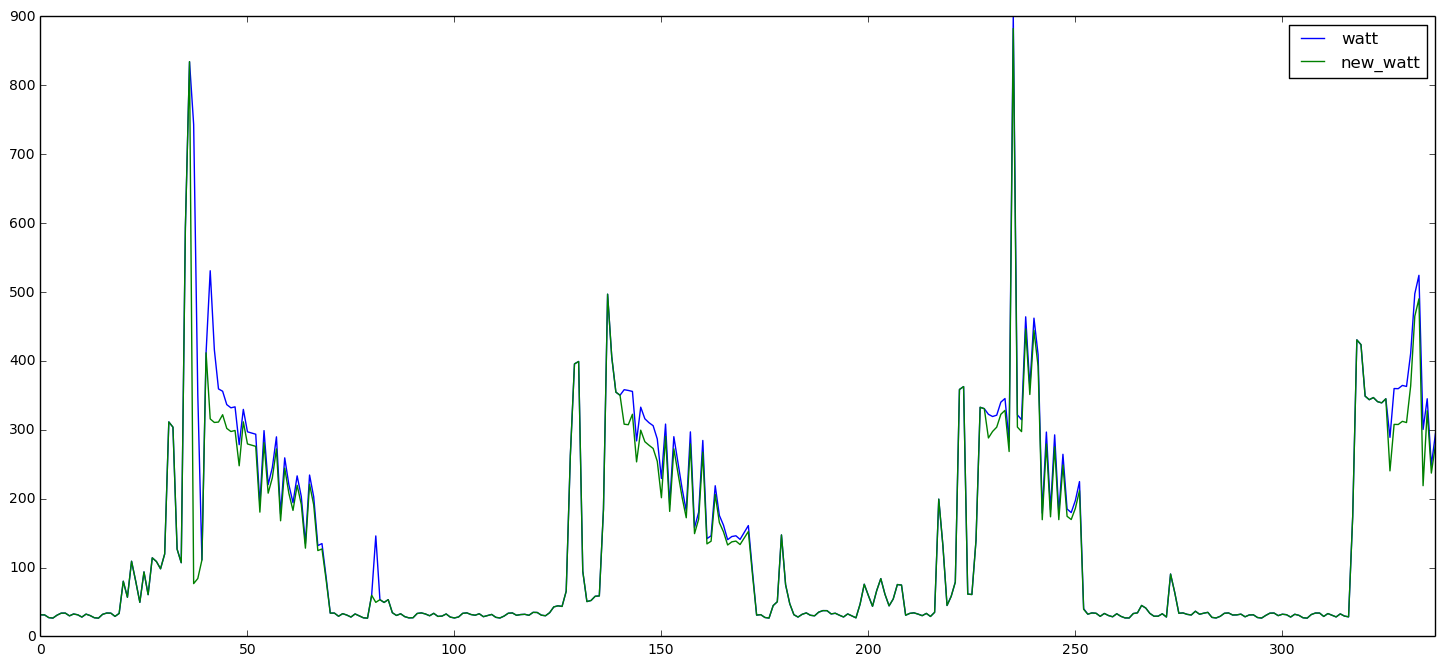

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
d = 30
time_a = pd.date_range('2016-10-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-10-01 00:14:59', periods=96*d, freq='15T')
# query = "SELECT Timestamp,watt FROM active.target_all WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "%(time_a[0],time_b[(96*d)-1])
query = "SELECT Timestamp,watt FROM active.target_all WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "%(time_a[(96*7)-50],time_b[(96*10)-1])
df = pd.read_sql(query, conn)

# query1 = "SELECT Timestamp,new_watt FROM active.discount20active15 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "%(time_a[0],time_b[(96*d)-1])
query1 = "SELECT Timestamp,new_watt FROM active.discount20active15 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "%(time_a[(96*7)-50],time_b[(96*10)-1])
df1 = pd.read_sql(query1, conn)

df['new_watt']=df1.new_watt
fig, ax = plt.subplots(nrows=1,figsize=(9*2, 4*2))
df.plot(ax=ax)
plt.show()


In [4]:
print df.watt.sum()
print df1.new_watt.sum()
print (df.watt.sum()- df1.new_watt.sum())/1000

368613.2438
340575.8176
28.0374262
